## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
m_m = pd.read_csv(mouse_metadata_path)
s_r = pd.read_csv(study_results_path)

# Combine the data into a single dataset
c_data = pd.merge(m_m, s_r, how="left", on="Mouse ID")

# Display the data table for preview
c_data.columns = c_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

c_data

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice
mice = c_data["mouse_id"].unique()
len(mice)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dup = c_data[c_data.duplicated(["mouse_id", "timepoint"])]

dup

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID
print(c_data.loc[c_data["mouse_id"] == "g989"])


    mouse_id drug_regimen     sex  age_months  weight_g  timepoint  \
908     g989     Propriva  Female          21        26          0   
909     g989     Propriva  Female          21        26          0   
910     g989     Propriva  Female          21        26          5   
911     g989     Propriva  Female          21        26          5   
912     g989     Propriva  Female          21        26         10   
913     g989     Propriva  Female          21        26         10   
914     g989     Propriva  Female          21        26         15   
915     g989     Propriva  Female          21        26         15   
916     g989     Propriva  Female          21        26         20   
917     g989     Propriva  Female          21        26         20   
918     g989     Propriva  Female          21        26         25   
919     g989     Propriva  Female          21        26         30   
920     g989     Propriva  Female          21        26         35   

     tumor_volume_m

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
no_dups = c_data.drop(c_data.index[[909, 911, 913, 915, 917]])

no_dups

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame
mice = no_dups["mouse_id"].unique()
len(mice)

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen
r_mean = no_dups.groupby("drug_regimen")["tumor_volume_mm3"].mean()
r_med = no_dups.groupby("drug_regimen")["tumor_volume_mm3"].median()
r_var = no_dups.groupby("drug_regimen")["tumor_volume_mm3"].var()
r_std = no_dups.groupby("drug_regimen")["tumor_volume_mm3"].std()
r_sem = no_dups.groupby("drug_regimen")["tumor_volume_mm3"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end
summary1 = [r_mean, r_med, r_var, r_std, r_sem]
index1 = ["Mean", "Median", "Variance", "S. Deviation", "SEM"]
summary1_df = pd.DataFrame(summary1, index=index1)
summary1_df

drug_regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.393463,40.216745,54.233149,53.236507
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.909965,40.673236,52.431737,51.818479
Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.138803,23.486704,59.450562,48.533355
S. Deviation,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.568014,4.846308,7.710419,6.966589
SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.525862,0.320955,0.573111,0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen
summary2_df = no_dups.groupby("drug_regimen").agg({"tumor_volume_mm3": ['mean', 'median', 'var', 'std', 'sem']})

# This method produces everything in a single groupby function
summary2_df

tumor_volume_mm3                                          
                         mean     median        var       std       sem
drug_regimen                                                           
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin            52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol           52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril            55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol            54.331565  52.509285  66.173479  8.134708  0.596466
Placebo             54.033581  52.288934  61.168083  7.821003  0.581331
Propriva            52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane            40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn            54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol           53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

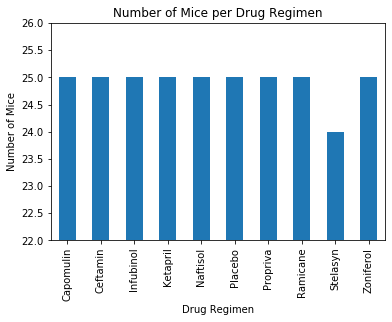

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using 
# pandas
mice_per_regimen = no_dups.groupby("drug_regimen")["mouse_id"].nunique().plot(kind="bar")

plt.ylim(22, 26)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")
plt.show()

(22, 26)

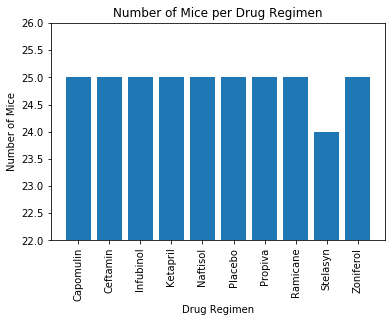

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using 
# pyplot
mice = [25, 25, 25, 25, 25, 25, 25, 25, 24, 25]
x_axis = np.arange(len(mice))
labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propiva", "Ramicane",
          "Stelasyn", "Zoniferol"]

plt.bar(x_axis, mice)
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(x_axis, labels, rotation=90)
plt.ylim(22, 26)

(-1.1053783437113598,
 1.100256111605303,
 -1.103265408136953,
 1.1062425414441643)

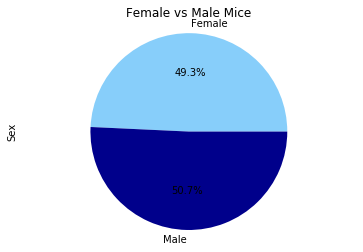

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fvm = no_dups.groupby("sex").size()

plt.title("Female vs Male Mice")
plt.pie(fvm, labels=["Female", "Male"], colors=["lightskyblue", "darkblue"], autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.axis("equal")

Text(0, 0.5, 'Sex')

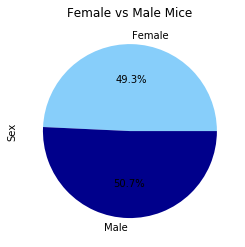

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [930, 958]
colors = ["lightskyblue", "darkblue"]

plt.pie(count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)
plt.title("Female vs Male Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen = pd.DataFrame(no_dups)
reg = regimen[(regimen.drug_regimen != "Ketapril") & (regimen.drug_regimen != "Naftisol") &
              (regimen.drug_regimen != "Placebo") & (regimen.drug_regimen != "Propriva") &
              (regimen.drug_regimen != "Stelasyn") & (regimen.drug_regimen != "Zoniferol")]

# Start by getting the last (greatest) timepoint for each mouse
time = reg.groupby("mouse_id")["timepoint"].max()
time_df = pd.DataFrame(time)
time_df.reset_index(inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
result = pd.merge(reg, time_df[["mouse_id", "timepoint"]], on="mouse_id")
res = result[result["timepoint_x"] == result["timepoint_y"]]
res.sort_values(by="drug_regimen")


,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint_x,tumor_volume_mm3,metastatic_sites,timepoint_y
317,j246,Capomulin,Female,21,21,35,38.753265,1,35
350,v923,Capomulin,Female,19,21,45,40.658124,2,45
340,w150,Capomulin,Male,23,23,10,39.952347,0,10
337,j119,Capomulin,Female,7,23,45,38.125164,1,45
380,l509,Capomulin,Male,17,21,45,41.483008,3,45
...,...,...,...,...,...,...,...,...,...
447,r921,Ramicane,Female,5,25,30,43.419381,1,30
449,w678,Ramicane,Female,5,24,5,43.166373,0,5
453,y449,Ramicane,Male,19,24,15,44.183451,0,15
234,r811,Ramicane,Male,9,19,45,37.225650,1,45


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    tumor_vol = res["tumor_volume_mm3"].loc[res["drug_regimen"] == treatment]
    
    # add subset
    tumor_data.append(tumor_vol)
       
    quartiles = res["tumor_volume_mm3"].quantile([.25, .50, .75])
    lowq = quartiles[0.25]
    upq = quartiles[0.75]
    iqr = upq - lowq
    
    print(f"For {treatment}, IQR is {iqr}.")
    
    # Determine outliers using upper and lower bounds
    low_b = lowq - (1.5*iqr)
    up_b = upq + (1.5*iqr)
    

For Capomulin, IQR is 22.74251795250001.
For Ramicane, IQR is 22.74251795250001.
For Infubinol, IQR is 22.74251795250001.
For Ceftamin, IQR is 22.74251795250001.


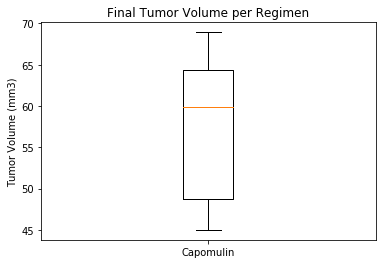

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax = tumor_data

fig, ax = plt.subplots()

ax.set_title('Final Tumor Volume per Regimen')
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vol, flierprops=dict(markerfacecolor='g', marker='D'))
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

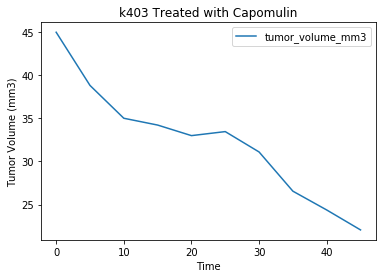

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
k403 = no_dups.loc[no_dups["mouse_id"] == "k403"]
k403.plot(x="timepoint", y="tumor_volume_mm3", kind="line")
plt.title("k403 Treated with Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

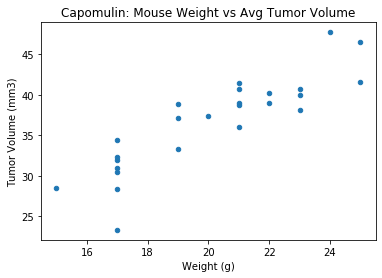

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grams = pd.DataFrame(res)
Capo = grams[(grams.drug_regimen == "Capomulin")]
Capo.plot(x="weight_g", y="tumor_volume_mm3", kind='scatter')
plt.title("Capomulin: Mouse Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = Capo.iloc[:, 4]
tumor = Capo.iloc[:, 6]
correlation = st.pearsonr(weight, tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f"The linear regression is {line_eq}.")

The correlation between both factors is 0.88.
The linear regression is y = 1.75x + 1.45.
